In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#importing the libraries

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import os
import warnings
from keras import backend

In [3]:
import tensorflow as tf
import math
from keras import layers
from keras.layers import Flatten, Conv2D, AveragePooling2D, MaxPooling2D,GlobalAveragePooling2D,Dense,Dropout,Concatenate
from keras.models import Model
from keras.preprocessing import image
from keras.initializers import glorot_uniform,he_normal,LecunUniformV2
from keras.applications.resnet import preprocess_input
from keras.regularizers import L2
from keras.callbacks import EarlyStopping

from matplotlib.pyplot import imshow
from keras.preprocessing.image import ImageDataGenerator

In [4]:
#Obtaining the images

image=ImageDataGenerator(preprocessing_function=preprocess_input,rescale = 1.0/255.0,validation_split=.1)
train=image.flow_from_directory("/content/drive/MyDrive/CNNmod1/Dataset",target_size=(224,224),class_mode='categorical',batch_size=15,subset='training',shuffle=True,seed=123)
testing=image.flow_from_directory("/content/drive/MyDrive/CNNmod1/Dataset",target_size=(224,224),class_mode='categorical',batch_size=1,subset='validation',shuffle=False)

Found 3420 images belonging to 4 classes.
Found 380 images belonging to 4 classes.


In [ ]:
loss =tf.keras.losses.CategoricalCrossentropy()

# Set up validation
val_loss = tf.keras.metrics.CategoricalCrossentropy(name='val_loss')
val_accuracy = tf.keras.metrics.CategoricalAccuracy(name='val_accuracy')

functionvalue=he_normal

In [ ]:
def inner_identity_block(input_tensor, kernel_size, filters, stage, block):
    
    filters1, filters2, filters3 = filters
    if backend.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = layers.Conv2D(filters1, (1, 1),
                      kernel_initializer=functionvalue,
                      name=conv_name_base + '2a')(input_tensor)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = layers.Activation('relu6')(x)

    # First depthwise convolution with 3x3 kernel
    x1 = layers.DepthwiseConv2D( kernel_size=(3,3), padding='same', depthwise_initializer=functionvalue)(x)
    x1 = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b1')(x1)
    
    # Second depthwise convolution with 5x5 kernel
    x2 = layers.DepthwiseConv2D( kernel_size=(5,5), padding='same', depthwise_initializer=functionvalue)(x)
    x2 = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b2')(x2)

    
    # Concatenate the output of the two depthwise convolutions
    x = Concatenate()([x1, x2])
    x = layers.Activation('relu6')(x)
    x = layers.Conv2D(filters3, (1, 1),
                      kernel_initializer=functionvalue,
                      name=conv_name_base + '2c')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = layers.add([x, input_tensor])
    return x


In [ ]:
def inner_conv_block(input_tensor,
               kernel_size,
               filters,
               stage,
               block,
               strides=(2, 2)):
   
    filters1, filters2, filters3 = filters
    if backend.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = layers.Conv2D(filters1, (1, 1), strides=strides,
                      kernel_initializer=functionvalue,
                      name=conv_name_base + '2a')(input_tensor)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = layers.Activation('relu6')(x)

   # First depthwise convolution with 3x3 kernel
    x1 = layers.DepthwiseConv2D( kernel_size=(3,3), padding='same', depthwise_initializer=functionvalue)(x)
    x1 = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b1')(x1)
    
    # Second depthwise convolution with 5x5 kernel
    x2 = layers.DepthwiseConv2D( kernel_size=(5,5), padding='same', depthwise_initializer=functionvalue)(x)
    x2 = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b2')(x2)

    
    # Concatenate the output of the two depthwise convolutions
    x = Concatenate()([x1, x2])
    x = layers.Activation('relu6')(x)

    x = layers.Conv2D(filters3, (1, 1),
                      kernel_initializer=functionvalue,
                      name=conv_name_base + '2c')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    shortcut = layers.Conv2D(filters3, (1, 1), strides=strides,
                             kernel_initializer=functionvalue,
                             name=conv_name_base + '1')(input_tensor)
    shortcut = layers.BatchNormalization(
        axis=bn_axis, name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    return x

In [ ]:
def outer_skip_connection(conv1,conv2,filters):
  if backend.image_data_format() == 'channels_last':
        bn_axis = 3
  else:
        bn_axis = 1
  conv2 = layers.Conv2D(filters, (1, 1), strides=2,
                             kernel_initializer=functionvalue)(conv2)
  conv2 = layers.BatchNormalization(bn_axis)(conv2)

  x = layers.add([conv1, conv2])
  x = layers.Activation('relu6')(x)
  return x




In [ ]:
#Basic model function calling

def DL_model(input_shape, outputClasses):
    
    
    if backend.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    # Define the input as a tensor with shape input_shape
    img_input = layers.Input(input_shape)    
    x = layers.ZeroPadding2D(padding=(3, 3), name='conv1_pad')(img_input)
    x = layers.Conv2D(64, (7, 7),
                      strides=(2, 2),
                      padding='valid',
                      kernel_initializer=functionvalue,
                      name='conv1')(x)
    x = layers.BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = layers.Activation('relu6')(x)
    x = layers.ZeroPadding2D(padding=(1, 1), name='pool1_pad')(x)
    x = layers.AveragePooling2D((3, 3), strides=(2, 2))(x)
   
    x = inner_conv_block(x, 3, [256,64, 64], stage=2, block='a', strides=(1, 1))
    y = x
    x = inner_identity_block(x, 3, [256,64, 64], stage=2, block='b')
    x = inner_identity_block(x, 3, [256,64, 64], stage=2, block='c')
  
    x = inner_conv_block(x, 3, [512,128, 128], stage=3, block='a')
    y = outer_skip_connection(x,y,128)
    x = y
    x = inner_identity_block(x, 3, [512,128, 128], stage=3, block='b')
    x = inner_identity_block(x, 3, [512,128, 128], stage=3, block='c')

    x = inner_conv_block(x, 3, [1024,256, 256], stage=4, block='a')
    y = outer_skip_connection(x,y,256)
    x = y
    x = inner_identity_block(x, 3, [1024,256, 256], stage=4, block='b')
    x = inner_identity_block(x, 3, [1024,256, 256], stage=4, block='c')
 
    x = inner_conv_block(x, 3, [2048,512, 512], stage=5, block='a')
    y = outer_skip_connection(x,y,512)
    x = y
    x = inner_identity_block(x, 3, [2048,512, 512], stage=5, block='d')
    x = inner_identity_block(x, 3, [2048,512, 512], stage=5, block='e')
    
    x = inner_conv_block(x, 3, [4096,1024,1024], stage=6, block='a',strides=(1, 1))
    
    x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
  
    x = Dense(1000, activation='relu6')(x)
    x = Dropout(.2)(x)
    
    x = layers.Dense(outputClasses, activation='softmax', name='fc1000')(x)

    model = Model(inputs=img_input, outputs=x, name='DL_model')

    return model

In [ ]:
# Compiling the model
from keras.optimizers import Adam
model = DL_model(input_shape=(224, 224, 3), outputClasses=4)
optimizer = Adam(learning_rate=0.005)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
early_stop = EarlyStopping(monitor='val_loss', patience=4)

Model: "DL_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/CNNmod1/DL_Model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

In [ ]:
#Training the model

model.fit(train,validation_data=testing, epochs=50,callbacks=[checkpoint_callback])

Epoch 1/50
228/228 [==============================] - ETA: 0s - loss: 0.6615 - accuracy: 0.7637
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to /content/drive/MyDrive/CNNmod1/DL_Model.h5
228/228 [==============================] - 2098s 9s/step - loss: 0.6615 - accuracy: 0.7637 - val_loss: 7.6201 - val_accuracy: 0.2500
Epoch 2/50
228/228 [==============================] - ETA: 0s - loss: 0.3498 - accuracy: 0.8719
Epoch 2: val_accuracy did not improve from 0.25000
228/228 [==============================] - 110s 481ms/step - loss: 0.3498 - accuracy: 0.8719 - val_loss: 8.4592 - val_accuracy: 0.2500
Epoch 3/50
228/228 [==============================] - ETA: 0s - loss: 0.2544 - accuracy: 0.9085
Epoch 3: val_accuracy improved from 0.25000 to 0.36053, saving model to /content/drive/MyDrive/CNNmod1/DL_Model.h5
228/228 [==============================] - 116s 509ms/step - loss: 0.2544 - accuracy: 0.9085 - val_loss: 2.8937 - val_accuracy: 0.3605
Epoch 4/50
228/228 [===========

In [7]:
#Predicting the model
y_pred=model.predict(testing)


380/380 [==============================] - 278s 710ms/step


In [8]:
import numpy as np

y_true = testing.classes

y_pred_labels = np.argmax(y_pred, axis=1)

In [9]:
#Making confusion matrix for the model

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred_labels)
cm

array([[95,  0,  0,  0],
       [ 0, 95,  0,  0],
       [ 0,  0, 94,  1],
       [ 0,  0,  0, 95]])

In [10]:
#Printing accuracy precision and accuracy of the model

precision = np.diag(cm) / np.sum(cm, axis=0)
recall = np.diag(cm) / np.sum(cm, axis=1)
accuracy = np.sum(np.diag(cm)) / np.sum(cm)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: [1.         1.         1.         0.98958333]
Recall: [1.         1.         0.98947368 1.        ]
Accuracy: 0.9973684210526316


In [11]:
#prediction values of bolt
matrix1 = cm[:2, :2]

#prediction values of disc
matrix2 = cm[2:, 2:]


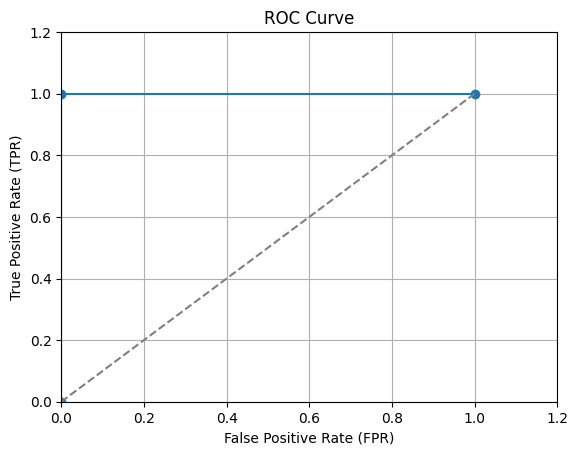

In [12]:
# Roc curve for Bolt damaged or not

import matplotlib.pyplot as plt

# Extract the TP, FP, TN, FN values from the matrix
TP = matrix1[0, 0]
FP = matrix1[0, 1]
TN = matrix1[1, 1]
FN = matrix1[1, 0]

# Calculate the TPR and FPR
tpr = TP / (TP + FN)
fpr = FP / (FP + TN)

# Plot the ROC curve
plt.plot([0, fpr, 1], [0, tpr, 1], marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.xlim([0, 1.2])
plt.ylim([0, 1.2])
plt.grid(True)
plt.show()


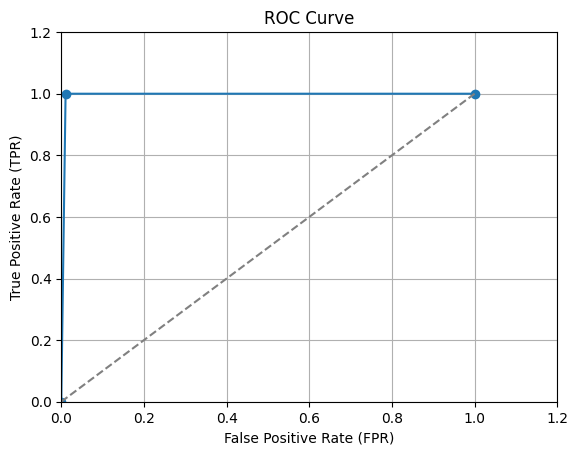

In [13]:
# Roc curve for Disc damaged or not

# Extract the TP, FP, TN, FN values from the matrix
TP = matrix2[0, 0]
FP = matrix2[0, 1]
TN = matrix2[1, 1]
FN = matrix2[1, 0]

# Calculate the TPR and FPR
tpr = TP / (TP + FN)
fpr = FP / (FP + TN)

# Plot the ROC curve
plt.plot([0, fpr, 1], [0, tpr, 1], marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.xlim([0, 1.2])
plt.ylim([0, 1.2])
plt.grid(True)
plt.show()


In [6]:
from keras.models import load_model

# Load the H5 model file
model = load_model('/content/drive/MyDrive/CNNmod1/DL_Model.h5')


In [15]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,rescale=1./255)

predict_data = datagen.flow_from_directory(directory='/content/drive/MyDrive/CNNmod1/Testing',
    target_size=(224, 224),
    class_mode=None,
    shuffle=False)
datagen1 = ImageDataGenerator(rescale=1./255)
predict_data1 = datagen1.flow_from_directory(directory='/content/drive/MyDrive/CNNmod1/Testing',
    target_size=(224, 224),
    class_mode=None,
    shuffle=False)

Found 14 images belonging to 1 classes.
Found 14 images belonging to 1 classes.


In [16]:
result_prob=model.predict(predict_data)


1/1 [==============================] - 2s 2s/step


In [17]:
result=np.argmax(result_prob,axis=1)
result

array([0, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 3, 3, 3])

In [18]:
import matplotlib.pyplot as plt

# Get the images and predicted probabilities
images = next(predict_data1)

fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(100, 100))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.set_axis_off()
    if result_prob[i] is not None:
        # Get the predicted class index and corresponding probability
        predicted_class = np.argmax(result_prob[i])
        probability = result_prob[i][predicted_class]
        if predicted_class == 0:
            ax.set_title(f'Defect (Prob: {probability:.2f})', fontsize=75)
        elif predicted_class == 1:
            ax.set_title(f'NonDefect (Prob: {probability:.2f})', fontsize=75)
        elif predicted_class == 2:
            ax.set_title(f'Defect (Prob: {probability:.2f})', fontsize=75)
        elif predicted_class == 3:
            ax.set_title(f'NonDefect (Prob: {probability:.2f})', fontsize=75)

plt.tight_layout()
plt.show()
